In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm

In [46]:
with open("local_optima_D.json", "r") as f:
    solutions = json.load(f)

In [47]:
# Find the best solution
best = min(solutions, key=lambda x: solutions[x]["score"])
best_solution, best_score = solutions[best]["solution"], solutions[best]["score"]
del solutions[best]

In [32]:
def compute_edge_similarity(path1, path2):
    # Convert paths to sets of tuples representing edges
    assert len(path1) == len(path2)
    n = len(path1)
    edges1 = []
    edges2 = []
    for i in range(n):
        edges1.append((path1[i], path1[(i+1)%n]))
        edges1.append((path1[(i+1)%n], path1[i]))
        edges2.append((path2[i], path2[(i+1)%n]))
        edges2.append((path2[(i+1)%n], path2[i]))    
    e1_set = set(edges1)
    e2_set = set(edges2)
    common_edges = e1_set.intersection(e2_set)

    # Return the number of common edges
    return int(len(common_edges) / 2)

# TESTS
path1 = [1, 2, 5, 4, 6, 3]
path2 = [3, 1, 5, 6, 2, 4]
similarity1 = compute_edge_similarity(path1, path2)
print("Similarity 1:", similarity1)

path1 = [1, 2, 5, 4, 6, 3]
path2 = [2, 1, 4, 5, 3, 6]
similarity2 = compute_edge_similarity(path1, path2)
print("Similarity 2:", similarity2)

path1 = [1, 2, 5, 4, 6, 3]
path2 = [2, 1, 4, 7, 3, 6]
similarity2 = compute_edge_similarity(path1, path2)
print("Similarity 3:", similarity2)

path1 = [1, 2, 5, 4, 6, 3, 7, 8, 9]
path2 = [9, 12, 15, 14, 16, 13, 17, 18, 1]
similarity2 = compute_edge_similarity(path1, path2)
print("Similarity 4:", similarity2)


Similarity 1: 1
Similarity 2: 3
Similarity 3: 2
Similarity 4: 1


In [33]:
def compute_nodes_similarity(path1, path2):
    # Convert paths to sets of tuples representing edges
    assert len(path1) == len(path2)
    nodes1 = set(path1)
    nodes2 = set(path2)
    common_nodes = nodes1.intersection(nodes2)

    # Return the number of common edges
    return len(common_nodes)

# TESTS
path1 = [1, 2, 5, 4, 6, 3]
path2 = [3, 1, 5, 6, 2, 4]
similarity1 = compute_nodes_similarity(path1, path2)
print("Similarity 1:", similarity1)

path1 = [1, 2, 5, 4, 6, 3]
path2 = [2, 1, 4, 5, 3, 6]
similarity2 = compute_nodes_similarity(path1, path2)
print("Similarity 2:", similarity2)

path1 = [1, 2, 5, 4, 6, 3]
path2 = [2, 1, 4, 7, 3, 6]
similarity2 = compute_nodes_similarity(path1, path2)
print("Similarity 3:", similarity2)

path1 = [1, 2, 5, 4, 6, 3, 7, 8, 9]
path2 = [9, 12, 15, 14, 16, 13, 17, 18, 1]
similarity2 = compute_nodes_similarity(path1, path2)
print("Similarity 4:", similarity2)

Similarity 1: 6
Similarity 2: 6
Similarity 3: 5
Similarity 4: 2


In [48]:
for sol in tqdm(solutions):
    similarity = compute_edge_similarity(best_solution, solutions[sol]["solution"])
    solutions[sol]["best_edge_similarity"] = similarity
    similarity = compute_nodes_similarity(best_solution, solutions[sol]["solution"])
    solutions[sol]["best_node_similarity"] = similarity
    all_edge_sim = 0
    all_node_sim = 0
    for sol2 in solutions:
        if sol == sol2:
            continue
        similarity = compute_edge_similarity(solutions[sol]["solution"], solutions[sol2]["solution"])
        all_edge_sim += similarity
        similarity = compute_nodes_similarity(solutions[sol]["solution"], solutions[sol2]["solution"])
        all_node_sim += similarity
    solutions[sol]["avg_edge_similarity"] = all_edge_sim / (len(solutions) - 1)
    solutions[sol]["avg_node_similarity"] = all_node_sim / (len(solutions) - 1)
        

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:48<00:00,  9.20it/s]


In [49]:
with open("local_optima_D_similarity.json", "w") as f:
    json.dump(solutions, f, indent=4)

# Create plots #

In [56]:
# read data
with open("local_optima_A_similarity.json", "r") as f:
    solutions_a = json.load(f)

with open("local_optima_B_similarity.json", "r") as f:
    solutions_b = json.load(f)
    
with open("local_optima_C_similarity.json", "r") as f:
    solutions_c = json.load(f)

with open("local_optima_D_similarity.json", "r") as f:
    solutions_d = json.load(f)

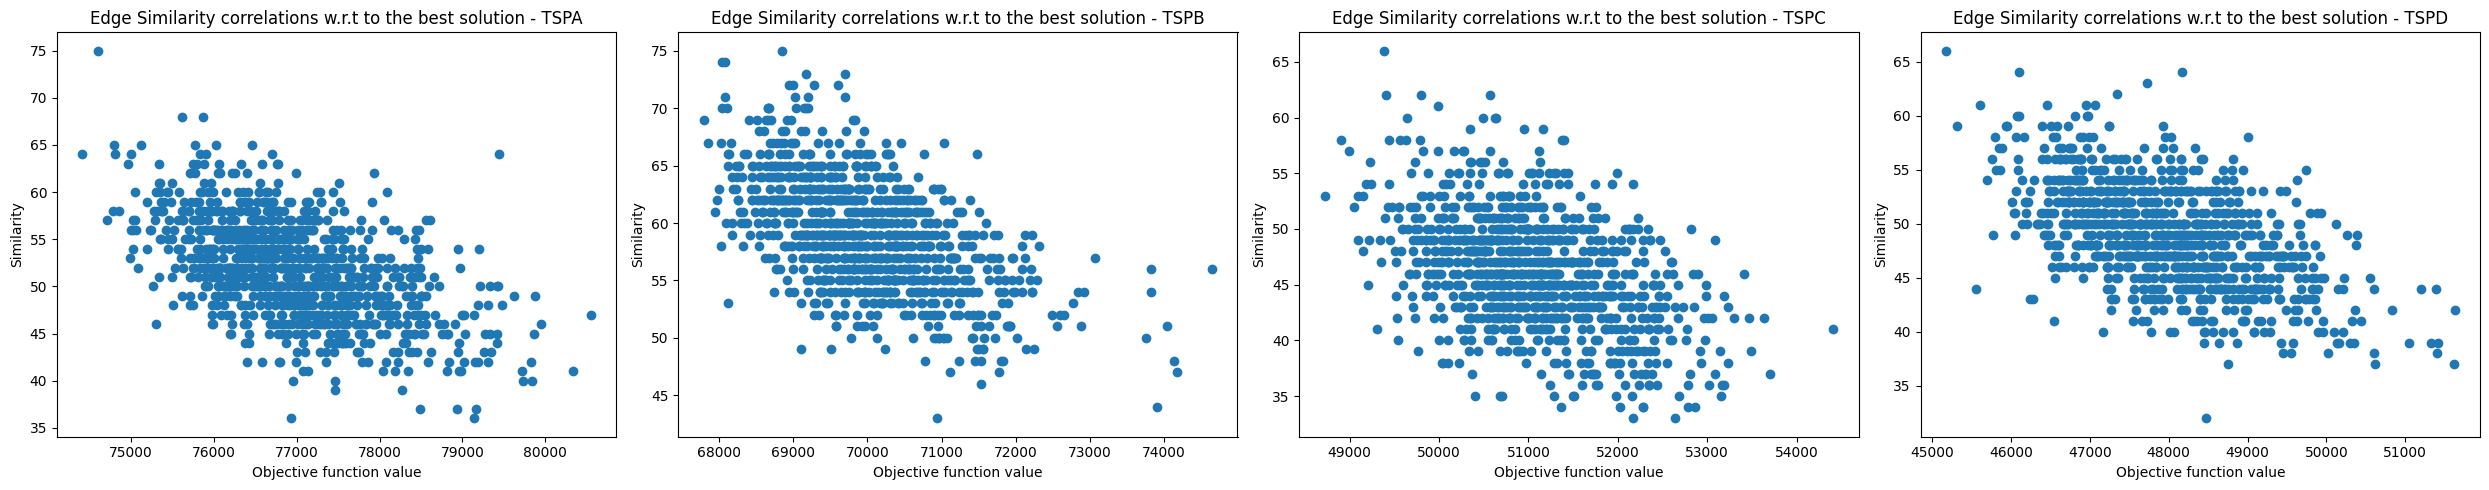

In [64]:
def plot_similarity_distribution(ax, solutions, label):
    # Compute the similarity distribution
    similarities = [solutions[sol]["best_edge_similarity"] for sol in solutions]
    similarities = np.array(similarities)
    scores = [solutions[sol]["score"] for sol in solutions]
    scores = np.array(scores)
    
    ax.scatter(scores, similarities, label=label)
    ax.set_title(f"Edge Similarity correlations w.r.t to the best solution - TSP{label}")
    ax.set_xlabel("Objective function value")
    ax.set_ylabel("Similarity")

# Assuming solutions_a, solutions_b, solutions_c, and solutions_d are defined
fig, axs = plt.subplots(1, 4, figsize=(25, 5))  # 1 row, 4 columns

# Plot each set of solutions on a separate subplot
plot_similarity_distribution(axs[0], solutions_a, "A")
plot_similarity_distribution(axs[1], solutions_b, "B")
plot_similarity_distribution(axs[2], solutions_c, "C")
plot_similarity_distribution(axs[3], solutions_d, "D")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

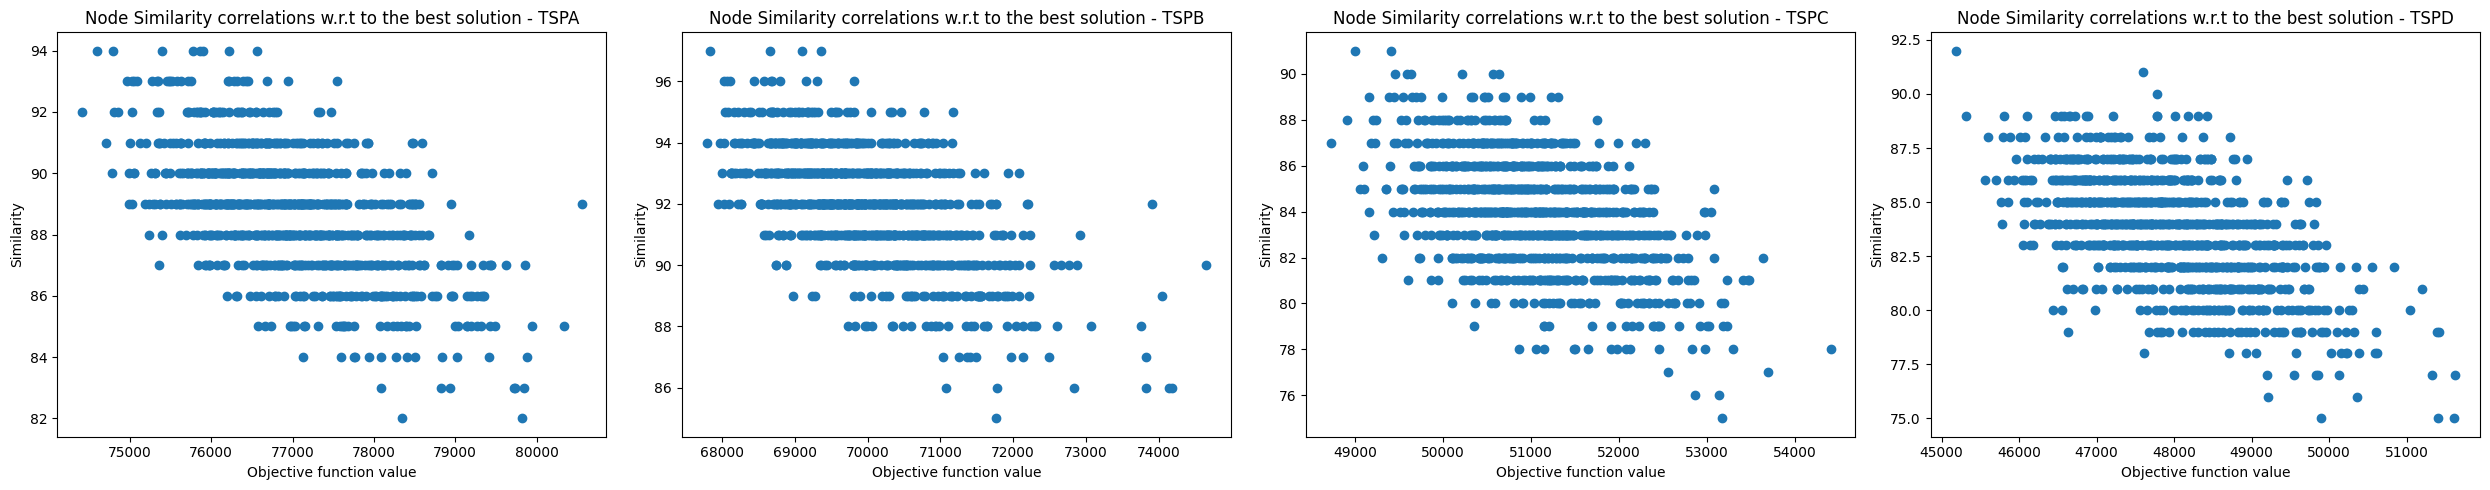

In [65]:
def plot_similarity_distribution(ax, solutions, label):
    # Compute the similarity distribution
    similarities = [solutions[sol]["best_node_similarity"] for sol in solutions]
    similarities = np.array(similarities)
    scores = [solutions[sol]["score"] for sol in solutions]
    scores = np.array(scores)
    
    ax.scatter(scores, similarities, label=label)
    ax.set_title(f"Node Similarity correlations w.r.t to the best solution - TSP{label}")
    ax.set_xlabel("Objective function value")
    ax.set_ylabel("Similarity")

# Assuming solutions_a, solutions_b, solutions_c, and solutions_d are defined
fig, axs = plt.subplots(1, 4, figsize=(25, 5))  # 1 row, 4 columns

# Plot each set of solutions on a separate subplot
plot_similarity_distribution(axs[0], solutions_a, "A")
plot_similarity_distribution(axs[1], solutions_b, "B")
plot_similarity_distribution(axs[2], solutions_c, "C")
plot_similarity_distribution(axs[3], solutions_d, "D")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

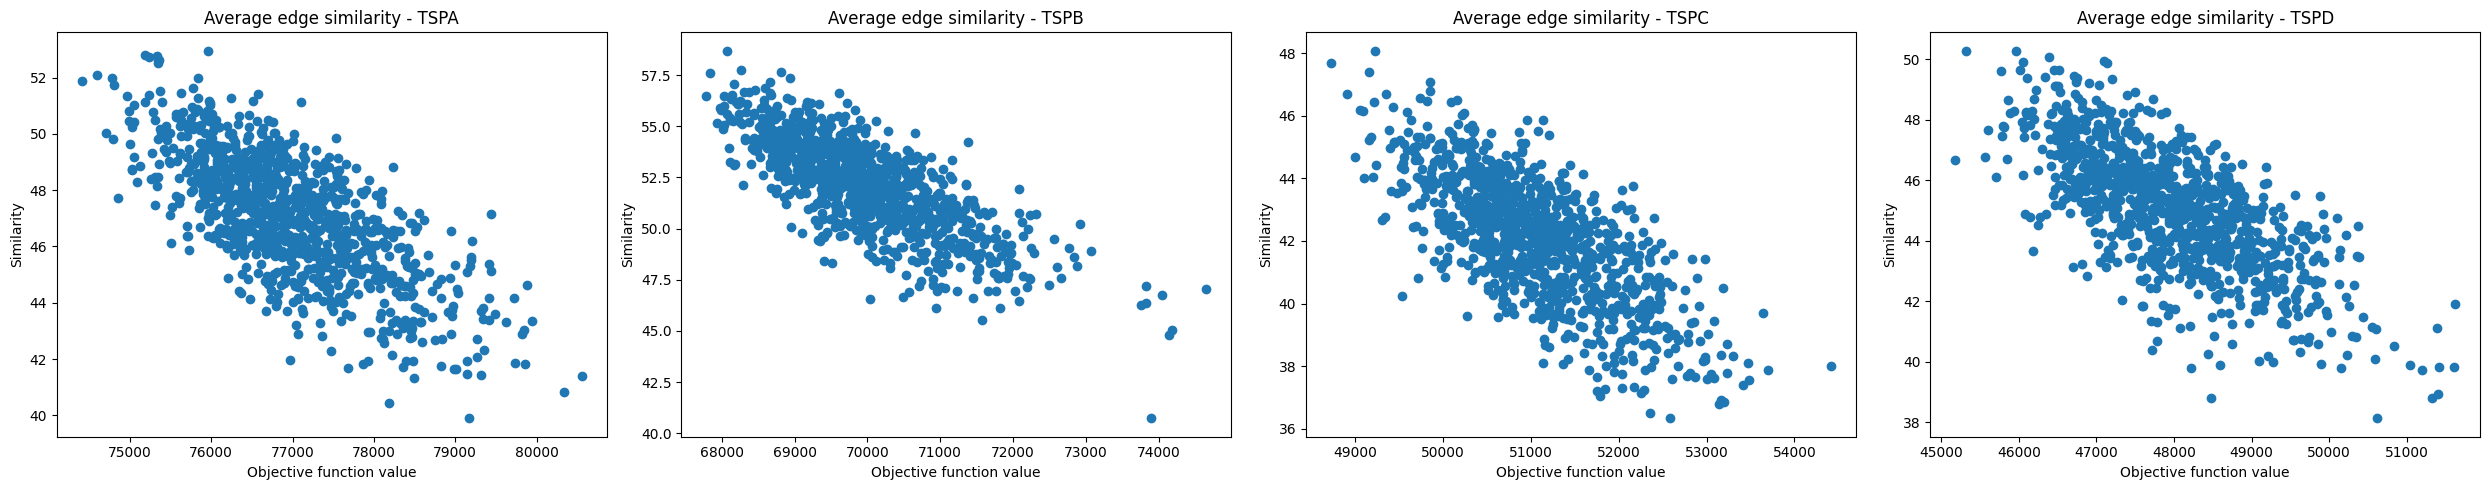

In [67]:
def plot_similarity_distribution(ax, solutions, label):
    # Compute the similarity distribution
    similarities = [solutions[sol]["avg_edge_similarity"] for sol in solutions]
    similarities = np.array(similarities)
    scores = [solutions[sol]["score"] for sol in solutions]
    scores = np.array(scores)
    
    ax.scatter(scores, similarities, label=label)
    ax.set_title(f"Average edge similarity - TSP{label}")
    ax.set_xlabel("Objective function value")
    ax.set_ylabel("Similarity")

# Assuming solutions_a, solutions_b, solutions_c, and solutions_d are defined
fig, axs = plt.subplots(1, 4, figsize=(25, 5))  # 1 row, 4 columns

# Plot each set of solutions on a separate subplot
plot_similarity_distribution(axs[0], solutions_a, "A")
plot_similarity_distribution(axs[1], solutions_b, "B")
plot_similarity_distribution(axs[2], solutions_c, "C")
plot_similarity_distribution(axs[3], solutions_d, "D")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

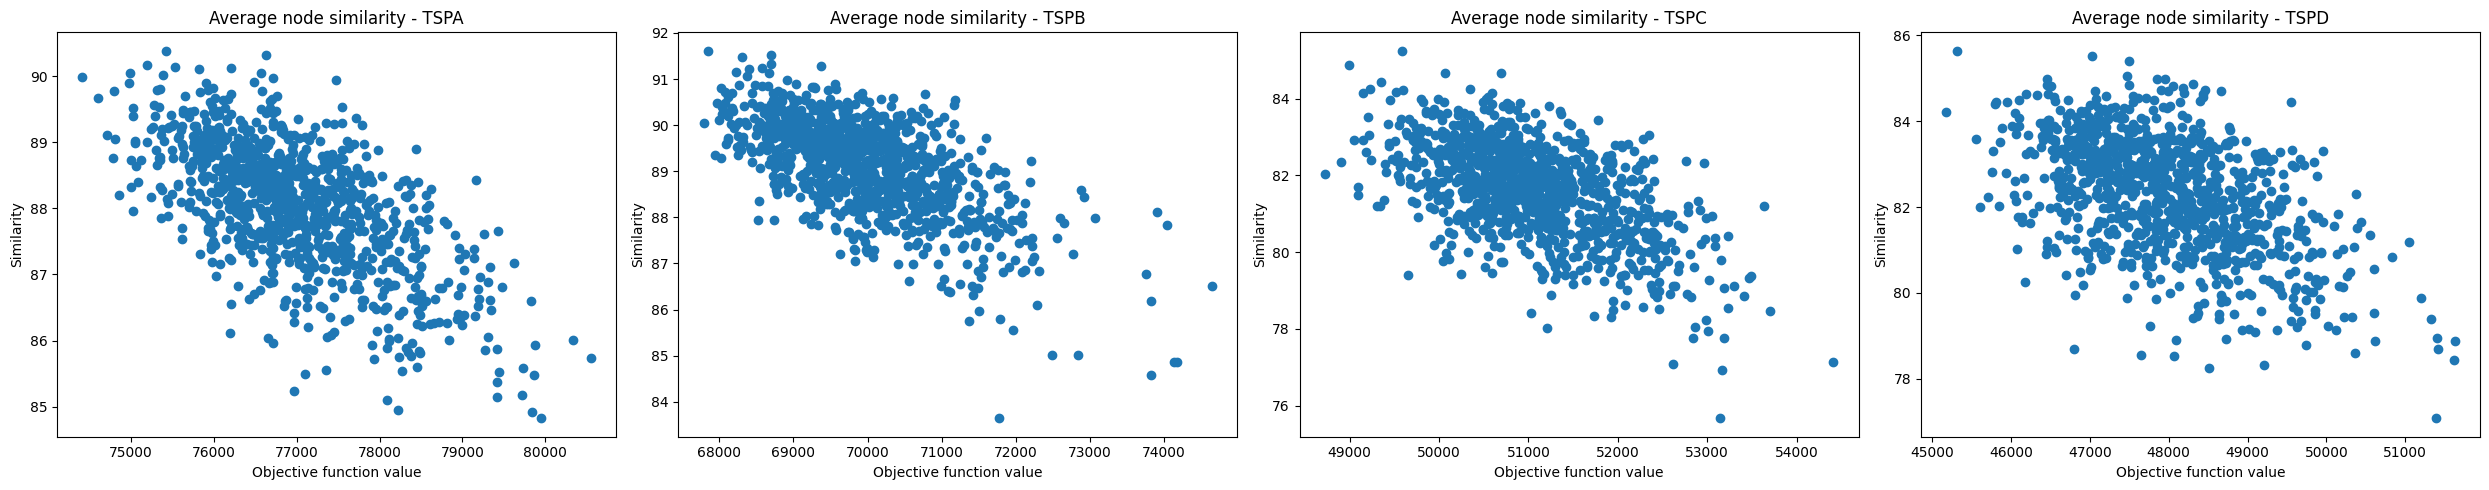

In [68]:
def plot_similarity_distribution(ax, solutions, label):
    # Compute the similarity distribution
    similarities = [solutions[sol]["avg_node_similarity"] for sol in solutions]
    similarities = np.array(similarities)
    scores = [solutions[sol]["score"] for sol in solutions]
    scores = np.array(scores)
    
    ax.scatter(scores, similarities, label=label)
    ax.set_title(f"Average node similarity - TSP{label}")
    ax.set_xlabel("Objective function value")
    ax.set_ylabel("Similarity")

# Assuming solutions_a, solutions_b, solutions_c, and solutions_d are defined
fig, axs = plt.subplots(1, 4, figsize=(25, 5))  # 1 row, 4 columns

# Plot each set of solutions on a separate subplot
plot_similarity_distribution(axs[0], solutions_a, "A")
plot_similarity_distribution(axs[1], solutions_b, "B")
plot_similarity_distribution(axs[2], solutions_c, "C")
plot_similarity_distribution(axs[3], solutions_d, "D")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()